In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
#importing dataset
feedgrains=pd.read_csv("FeedGrains.csv")
feedgrains

,SC_Group_ID,SC_Group_Desc,SC_GroupCommod_ID,SC_GroupCommod_Desc,SC_Geography_ID,SortOrder,SC_GeographyIndented_Desc,SC_Commodity_ID,SC_Commodity_Desc,SC_Attribute_ID,SC_Attribute_Desc,SC_Unit_ID,SC_Unit_Desc,Year_ID,SC_Frequency_ID,SC_Frequency_Desc,Timeperiod_ID,Timeperiod_Desc,Amount
0,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,8,Aug,0.690000
1,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,9,Sep,0.690000
2,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,10,Oct,0.700000
3,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,11,Nov,0.760000
4,1,Prices,17.0,Oats,1,0.8,United States,3,Oats,5,Prices received by farmers,4,Dollars per bushel,1948,1,Monthly,12,Dec,0.760000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463113,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),2,Corn,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2019,1,Monthly,7,Jul,0.631104
463114,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1991,3,Annual,114,MY Oct-Sep,10.000000
463115,2,Supply and use,12.0,Corn,204,187.0,China (Taiwan),2,Corn,35,"Exports, trade year",7,"1,000 metric tons",1992,3,Annual,114,MY Oct-Sep,17.000000
463116,3,Exports and imports,12.0,Corn,204,187.0,China (Taiwan),11,Corn grain,19,"Imports, to U.S. from specified source",7,"1,000 metric tons",2018,3,Annual,31,MY Sep-Aug,0.000306


In [9]:
# number of rows and columns
feedgrains.shape

(463118, 19)

In [11]:
feedgrains.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463118 entries, 0 to 463117
Data columns (total 19 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   SC_Group_ID                463118 non-null  int64  
 1   SC_Group_Desc              463118 non-null  object 
 2   SC_GroupCommod_ID          455269 non-null  float64
 3   SC_GroupCommod_Desc        455269 non-null  object 
 4   SC_Geography_ID            463118 non-null  int64  
 5   SortOrder                  463118 non-null  float64
 6   SC_GeographyIndented_Desc  463118 non-null  object 
 7   SC_Commodity_ID            463118 non-null  int64  
 8   SC_Commodity_Desc          463118 non-null  object 
 9   SC_Attribute_ID            463118 non-null  int64  
 10  SC_Attribute_Desc          463118 non-null  object 
 11  SC_Unit_ID                 463118 non-null  int64  
 12  SC_Unit_Desc               463118 non-null  object 
 13  Year_ID                    46

In [13]:
feedgrains.describe()

,SC_Group_ID,SC_GroupCommod_ID,SC_Geography_ID,SortOrder,SC_Commodity_ID,SC_Attribute_ID,SC_Unit_ID,Year_ID,SC_Frequency_ID,Timeperiod_ID,Amount
count,463118.000000,455269.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,463118.000000,4.631180e+05
mean,2.836886,12.546000,88.719387,76.592939,34.930059,22.775070,7.674871,2002.218568,1.388320,15.897797,6.591591e+05
std,0.756613,3.138582,82.007304,78.348583,34.568156,6.034082,3.900039,13.226970,0.771797,26.082172,2.326463e+07
min,1.000000,8.000000,1.000000,0.020000,1.000000,1.000000,1.000000,1866.000000,1.000000,1.000000,-6.353320e+02
25%,3.000000,10.000000,30.000000,1.600000,2.000000,19.000000,7.000000,1995.000000,1.000000,4.000000,8.882811e-02
50%,3.000000,12.000000,51.000000,57.500000,14.000000,24.000000,7.000000,2004.000000,1.000000,8.000000,2.275850e+00
75%,3.000000,12.000000,141.000000,150.000000,76.000000,24.000000,7.000000,2012.000000,1.000000,12.000000,4.439208e+01
max,7.000000,20.000000,339.000000,285.000000,212.000000,61.000000,46.000000,2019.000000,3.000000,137.000000,2.597865e+09


In [15]:
#dropping irrelevant columns

In [17]:
feedgrains=feedgrains.drop(columns=["SC_Group_ID","SC_Group_Desc","SC_GroupCommod_ID","SC_Geography_ID","SortOrder","SC_Commodity_ID","SC_Commodity_Desc","SC_Attribute_ID","SC_Attribute_Desc","SC_Unit_ID","SC_Frequency_ID","Timeperiod_ID"])
feedgrains

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Oats,United States,Dollars per bushel,1948,Monthly,Aug,0.690000
1,Oats,United States,Dollars per bushel,1948,Monthly,Sep,0.690000
2,Oats,United States,Dollars per bushel,1948,Monthly,Oct,0.700000
3,Oats,United States,Dollars per bushel,1948,Monthly,Nov,0.760000
4,Oats,United States,Dollars per bushel,1948,Monthly,Dec,0.760000
...,...,...,...,...,...,...,...
463113,Corn,China (Taiwan),"1,000 metric tons",2019,Monthly,Jul,0.631104
463114,Corn,China (Taiwan),"1,000 metric tons",1991,Annual,MY Oct-Sep,10.000000
463115,Corn,China (Taiwan),"1,000 metric tons",1992,Annual,MY Oct-Sep,17.000000
463116,Corn,China (Taiwan),"1,000 metric tons",2018,Annual,MY Sep-Aug,0.000306


In [19]:
#selecting only specific feedgrains

In [21]:
# Define the list of specific feedgrains
specific_feedgrains = ['Oats', 'Sorghum', 'Barley', 'Corn', 'Byproduct feeds']
# Filter the dataset to include only rows with the specified feedgrains
feedgrains= feedgrains[feedgrains['SC_GroupCommod_Desc'].isin(specific_feedgrains)]

In [23]:
#renaming the location

In [25]:
rename_location={'        Canada':'Canada','    Western Hemisphere':'Western Hemisphere','      North America':'North America'}
# Rename specific values in the column
feedgrains['SC_GeographyIndented_Desc'] = feedgrains['SC_GeographyIndented_Desc'].replace(rename_location)

# Check the updated column
print(feedgrains['SC_GeographyIndented_Desc'].unique())

['United States' 'U.S. - Gulf ports, LA' 'U.S. - Minneapolis, MN'
 'U.S. - St Louis, MO' 'U.S. - Omaha, NE' 'U.S. - Chicago, IL'
 'U.S. - Kansas City, MO' 'U.S. - Toledo, OH'
 'U.S. - Plainview to Muleshoe, TX' 'U.S. - Portland, OR'
 'U.S. - Memphis, TN' 'U.S. - Midwest' 'World' '  World less U.S.'
 'U.S. - Fort Worth, TX' 'U.S. - New York, NY' 'U.S. - AR'
 'U.S. - Central IL' '  Latin America' '      Central America'
 '      Caribbean' '      South America' '        European Union-15'
 '    Asia and Middle East' '      Middle East' '        South Asia'
 '        Southeast Asia' '    Oceania' '    Africa' '      North Africa'
 '      Sub-Saharan Africa' 'Western Hemisphere' 'North America'
 '    Europe/Eurasia' '      European Union-25' '        Acceding-10'
 '      Other Europe' '      Former Soviet Union-12' '      Asia'
 '        East Asia' 'Canada' '        Greenland' '        Mexico'
 '        Guatemala' '        Belize' '        El Salvador'
 '        Honduras' '        Nicaragua

C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\3985421784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feedgrains['SC_GeographyIndented_Desc'] = feedgrains['SC_GeographyIndented_Desc'].replace(rename_location)


In [27]:
#selecting only specific locations

In [29]:
# Define the list of specific locations
specific_locations = ['United States', 'World','Canada','North America','Western Hemisphere']
# Filter the dataset to include only rows with the specified locations
feedgrains= feedgrains[feedgrains['SC_GeographyIndented_Desc'].isin(specific_locations)]

In [31]:
#selecting 'monthly' and 'Annual' from SC_Frequency_Desc

In [33]:
# Define the list of specific frequency
specific_frequency = ['Monthly','Annual']
# Filter the dataset to include only rows with the specified frequency
feedgrains= feedgrains[feedgrains['SC_Frequency_Desc'].isin(specific_frequency)]

In [35]:
feedgrains

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Oats,United States,Dollars per bushel,1948,Monthly,Aug,0.690
1,Oats,United States,Dollars per bushel,1948,Monthly,Sep,0.690
2,Oats,United States,Dollars per bushel,1948,Monthly,Oct,0.700
3,Oats,United States,Dollars per bushel,1948,Monthly,Nov,0.760
4,Oats,United States,Dollars per bushel,1948,Monthly,Dec,0.760
...,...,...,...,...,...,...,...
406673,Oats,United States,Dollars per bushel,1948,Monthly,Jun,1.070
406674,Oats,United States,Dollars per bushel,1948,Monthly,Jul,0.870
461892,Oats,United States,Million acres,2017,Annual,Commodity Market Year,0.804
461893,Oats,United States,Million acres,2018,Annual,Commodity Market Year,0.865


In [37]:
feedgrains.SC_GroupCommod_Desc.value_counts()	

SC_GroupCommod_Desc
Barley             21770
Corn               19102
Oats               14531
Sorghum             6441
Byproduct feeds     4530
Name: count, dtype: int64

In [39]:
feedgrains.SC_GeographyIndented_Desc.value_counts()

SC_GeographyIndented_Desc
World                 19612
United States         14412
Western Hemisphere    10904
North America         10779
Canada                10667
Name: count, dtype: int64

In [41]:
feedgrains.SC_Unit_Desc.value_counts()

SC_Unit_Desc
1,000 metric tons     41982
Bushels                7808
Dollars per bushel     6899
Million bushels        3102
1,000 liters           3062
Dollars per cwt        1248
Million acres           926
Gallons                 794
Bushels per acre        553
Name: count, dtype: int64

In [43]:
feedgrains.SC_Unit_Desc.unique()

array(['Dollars per bushel', 'Million acres', 'Bushels per acre',
       'Dollars per cwt', 'Million bushels', '1,000 metric tons',
       'Bushels', 'Gallons', '1,000 liters'], dtype=object)

In [45]:
# removing irrelevant units

In [47]:
irrelevant_units = ['Gallons', 'Bushels per acre']
# Filter out rows with irrelevant units
new_feed= feedgrains[~feedgrains['SC_Unit_Desc'].isin(irrelevant_units)]

# Check the shape and preview the data
print("Original dataset shape:", feedgrains.shape)
print("Filtered dataset shape:", new_feed.shape)
print(new_feed['SC_Unit_Desc'].value_counts())

Original dataset shape: (66374, 7)
Filtered dataset shape: (65027, 7)
SC_Unit_Desc
1,000 metric tons     41982
Bushels                7808
Dollars per bushel     6899
Million bushels        3102
1,000 liters           3062
Dollars per cwt        1248
Million acres           926
Name: count, dtype: int64


In [49]:
new_feed

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Oats,United States,Dollars per bushel,1948,Monthly,Aug,0.690
1,Oats,United States,Dollars per bushel,1948,Monthly,Sep,0.690
2,Oats,United States,Dollars per bushel,1948,Monthly,Oct,0.700
3,Oats,United States,Dollars per bushel,1948,Monthly,Nov,0.760
4,Oats,United States,Dollars per bushel,1948,Monthly,Dec,0.760
...,...,...,...,...,...,...,...
406673,Oats,United States,Dollars per bushel,1948,Monthly,Jun,1.070
406674,Oats,United States,Dollars per bushel,1948,Monthly,Jul,0.870
461892,Oats,United States,Million acres,2017,Annual,Commodity Market Year,0.804
461893,Oats,United States,Million acres,2018,Annual,Commodity Market Year,0.865


In [51]:
new_feed.Timeperiod_Desc.unique()

array(['Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Commodity Market Year', 'Jan',
       'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'MY Sep-Aug',
       'MY Jun-May', 'MY Oct-Sep', 'MY Aug-Jul', 'MMY AT'], dtype=object)

In [53]:
new_feed.Timeperiod_Desc.value_counts()

Timeperiod_Desc
Apr                      4711
May                      4703
Jun                      4686
Mar                      4675
Jul                      4662
Jan                      4657
Feb                      4655
Aug                      4532
Oct                      4529
Sep                      4520
Dec                      4513
Nov                      4509
MY Jun-May               3465
MY Sep-Aug               3262
Commodity Market Year    2333
MY Oct-Sep                541
MMY AT                     43
MY Aug-Jul                 31
Name: count, dtype: int64

In [55]:
#standardize market year(renaming)

In [57]:
# Mapping for standardizing marketing year descriptions
timeperiod_mapping = {
    'MY Sep-Aug': 'MY(Sep-Aug)',
    'MY Jun-May': 'MY(Jun-May)',
    'MY Oct-Sep': 'MY (Oct-Sep)',
    'MY Aug-Jul': 'MY (Aug-Jul)',
    'Commodity Market Year':'CMY'
}

# Apply the mapping
new_feed['Timeperiod_Desc'] = new_feed['Timeperiod_Desc'].replace(timeperiod_mapping)


C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\2481081925.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_feed['Timeperiod_Desc'] = new_feed['Timeperiod_Desc'].replace(timeperiod_mapping)


In [59]:
# Define irrelevant periods
irrelevant_periods = ['MMY AT']

# Filter the dataset
new_feed = new_feed[~new_feed['Timeperiod_Desc'].isin(irrelevant_periods)]

# Check the remaining unique values
print(new_feed['Timeperiod_Desc'].unique())


['Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'CMY' 'Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun'
 'Jul' 'MY(Sep-Aug)' 'MY(Jun-May)' 'MY (Oct-Sep)' 'MY (Aug-Jul)']


In [61]:
new_feed

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,SC_Frequency_Desc,Timeperiod_Desc,Amount
0,Oats,United States,Dollars per bushel,1948,Monthly,Aug,0.690
1,Oats,United States,Dollars per bushel,1948,Monthly,Sep,0.690
2,Oats,United States,Dollars per bushel,1948,Monthly,Oct,0.700
3,Oats,United States,Dollars per bushel,1948,Monthly,Nov,0.760
4,Oats,United States,Dollars per bushel,1948,Monthly,Dec,0.760
...,...,...,...,...,...,...,...
406673,Oats,United States,Dollars per bushel,1948,Monthly,Jun,1.070
406674,Oats,United States,Dollars per bushel,1948,Monthly,Jul,0.870
461892,Oats,United States,Million acres,2017,Annual,CMY,0.804
461893,Oats,United States,Million acres,2018,Annual,CMY,0.865


In [63]:
new_feed.Timeperiod_Desc.value_counts()

Timeperiod_Desc
Apr             4711
May             4703
Jun             4686
Mar             4675
Jul             4662
Jan             4657
Feb             4655
Aug             4532
Oct             4529
Sep             4520
Dec             4513
Nov             4509
MY(Jun-May)     3465
MY(Sep-Aug)     3262
CMY             2333
MY (Oct-Sep)     541
MY (Aug-Jul)      31
Name: count, dtype: int64

In [65]:
new_feed=new_feed.drop(columns=['SC_Frequency_Desc'])

In [67]:
new_feed

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount
0,Oats,United States,Dollars per bushel,1948,Aug,0.690
1,Oats,United States,Dollars per bushel,1948,Sep,0.690
2,Oats,United States,Dollars per bushel,1948,Oct,0.700
3,Oats,United States,Dollars per bushel,1948,Nov,0.760
4,Oats,United States,Dollars per bushel,1948,Dec,0.760
...,...,...,...,...,...,...
406673,Oats,United States,Dollars per bushel,1948,Jun,1.070
406674,Oats,United States,Dollars per bushel,1948,Jul,0.870
461892,Oats,United States,Million acres,2017,CMY,0.804
461893,Oats,United States,Million acres,2018,CMY,0.865


In [69]:
# Sample 5000 rows
sampled_data = new_feed.sample(n=5000, random_state=42)

In [71]:
feed_grain=sampled_data
feed_grain

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount
213076,Sorghum,Canada,"1,000 metric tons",1992,Jul,0.105000
155289,Corn,Western Hemisphere,"1,000 liters",2013,Sep,143616.305000
15402,Oats,United States,Million bushels,2001,MY(Jun-May),59.200000
68232,Sorghum,World,Bushels,1996,May,50.391360
163438,Oats,North America,"1,000 metric tons",2001,Mar,93.413899
...,...,...,...,...,...,...
219054,Oats,Canada,"1,000 metric tons",2006,Oct,1.027000
2510,Barley,United States,Dollars per bushel,1919,Nov,1.190000
153807,Barley,Western Hemisphere,"1,000 metric tons",2004,Oct,8.067000
68925,Sorghum,World,Bushels,2013,Oct,4629.706200


In [73]:
feed_grain.duplicated().sum()

4

In [75]:
feed_grain= feed_grain.drop_duplicates(subset=['SC_GroupCommod_Desc','SC_GeographyIndented_Desc','SC_Unit_Desc','Year_ID','Timeperiod_Desc','Amount'])


In [77]:
new_feed.duplicated().sum()

572

In [79]:
feed_grain.isnull().sum()

SC_GroupCommod_Desc          0
SC_GeographyIndented_Desc    0
SC_Unit_Desc                 0
Year_ID                      0
Timeperiod_Desc              0
Amount                       0
dtype: int64

In [81]:
feed_grain

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount
213076,Sorghum,Canada,"1,000 metric tons",1992,Jul,0.105000
155289,Corn,Western Hemisphere,"1,000 liters",2013,Sep,143616.305000
15402,Oats,United States,Million bushels,2001,MY(Jun-May),59.200000
68232,Sorghum,World,Bushels,1996,May,50.391360
163438,Oats,North America,"1,000 metric tons",2001,Mar,93.413899
...,...,...,...,...,...,...
219054,Oats,Canada,"1,000 metric tons",2006,Oct,1.027000
2510,Barley,United States,Dollars per bushel,1919,Nov,1.190000
153807,Barley,Western Hemisphere,"1,000 metric tons",2004,Oct,8.067000
68925,Sorghum,World,Bushels,2013,Oct,4629.706200


In [83]:
feed_grain.shape

(4996, 6)

In [85]:
#visualization

# 1.Distribution of Feed Types

In [88]:
feed_grain.SC_GroupCommod_Desc.value_counts()

SC_GroupCommod_Desc
Barley             1661
Corn               1377
Oats               1117
Sorghum             531
Byproduct feeds     310
Name: count, dtype: int64

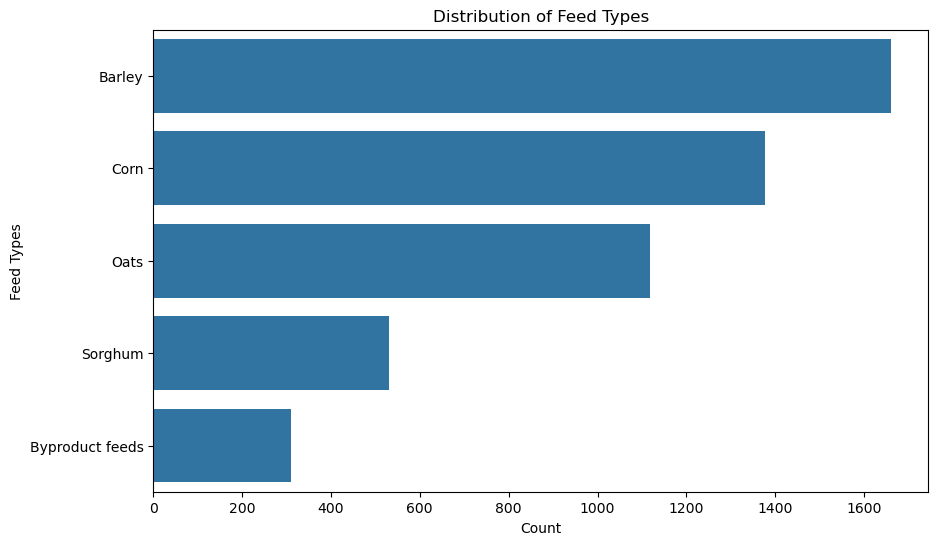

In [90]:
# Bar plot for feed types
plt.figure(figsize=(10, 6))
sns.countplot(y='SC_GroupCommod_Desc', data=feed_grain, order=feed_grain['SC_GroupCommod_Desc'].value_counts().index)
plt.title('Distribution of Feed Types')
plt.xlabel('Count')
plt.ylabel('Feed Types')
plt.show()


In [91]:
# Example: Select specific columns
selected_column= ['SC_GroupCommod_Desc','Year_ID', 'Amount']
selected_df = feed_grain[selected_column]

print(selected_df)  # Display the first few rows


       SC_GroupCommod_Desc  Year_ID         Amount
213076             Sorghum     1992       0.105000
155289                Corn     2013  143616.305000
15402                 Oats     2001      59.200000
68232              Sorghum     1996      50.391360
163438                Oats     2001      93.413899
...                    ...      ...            ...
219054                Oats     2006       1.027000
2510                Barley     1919       1.190000
153807              Barley     2004       8.067000
68925              Sorghum     2013    4629.706200
70982                 Corn     2006    4613.183778

[4996 rows x 3 columns]


In [94]:
# Example: Filter data for years >= 2000
filtered_df = feed_grain[feed_grain['Year_ID'] >= 2000]

# Check the filtered data
print(filtered_df['Year_ID'].unique())  # Verify the years included


[2013 2001 2017 2010 2005 2007 2016 2000 2003 2015 2004 2011 2014 2006
 2012 2018 2002 2019 2009 2008]


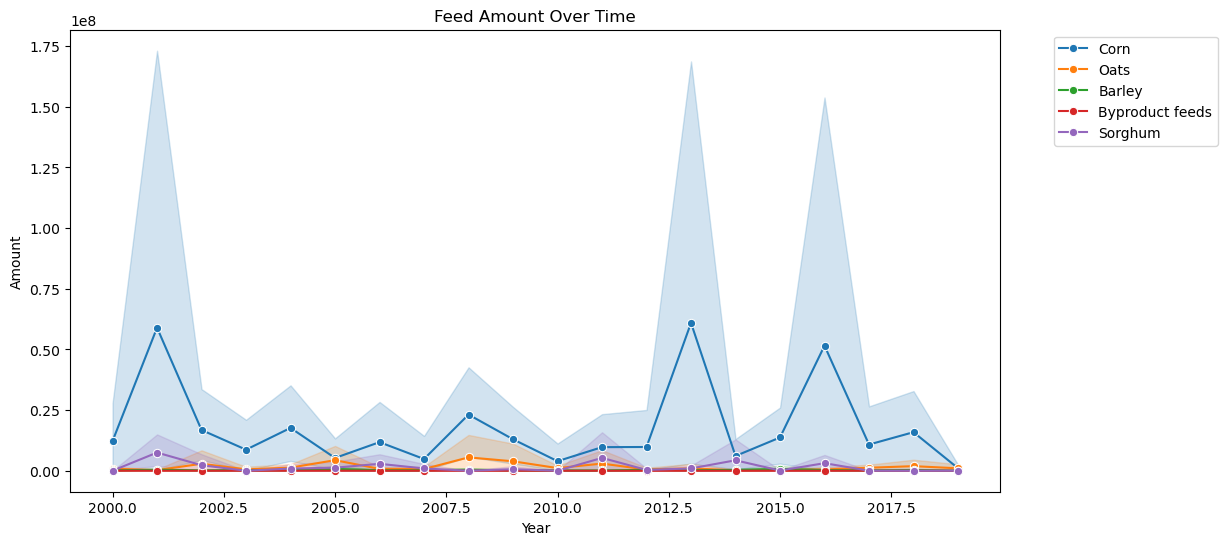

In [96]:
# Line plot of Amount over Years
plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered_df, x='Year_ID', y='Amount', hue='SC_GroupCommod_Desc', marker='o')
plt.title('Feed Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


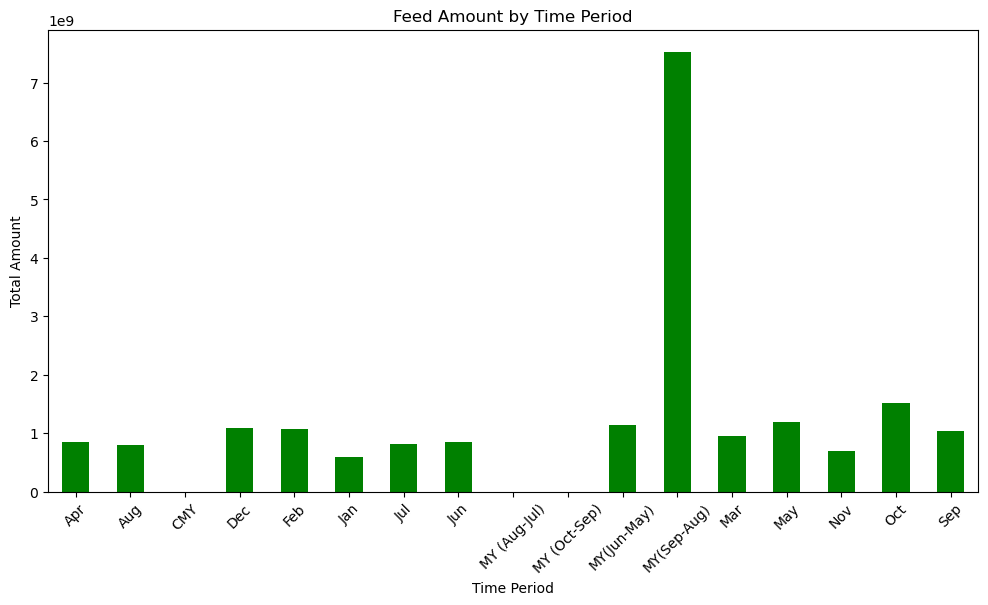

In [97]:
# Group data by Time Period and aggregate the amount
time_period_data = feed_grain.groupby('Timeperiod_Desc')['Amount'].sum()

# Bar plot
plt.figure(figsize=(12, 6))
time_period_data.plot(kind='bar', color='green')
plt.title('Feed Amount by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()


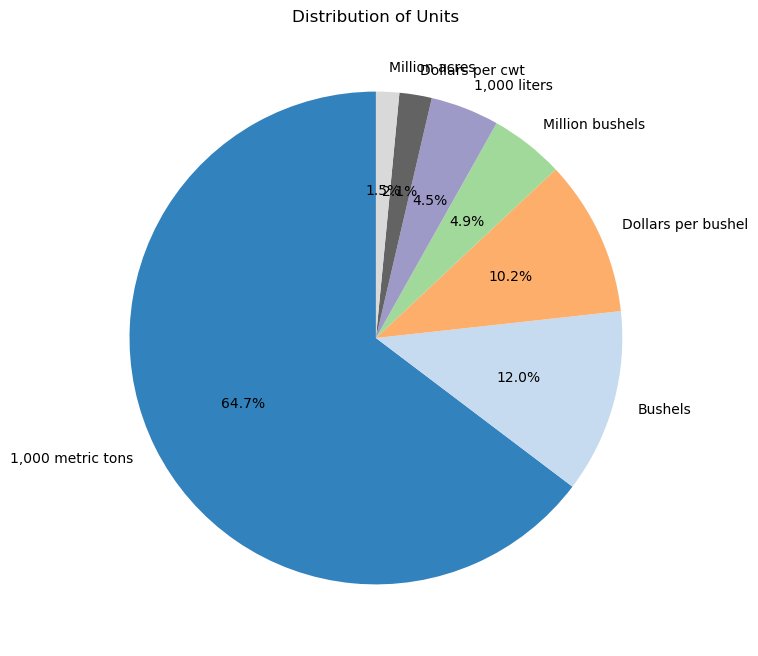

In [98]:
# Pie chart for units
unit_counts = feed_grain['SC_Unit_Desc'].value_counts()

plt.figure(figsize=(8, 8))
unit_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')
plt.title('Distribution of Units')
plt.ylabel('')
plt.show()


C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\1939699984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feed_grain['Amount'],color = 'b')


<Axes: xlabel='Amount', ylabel='Density'>

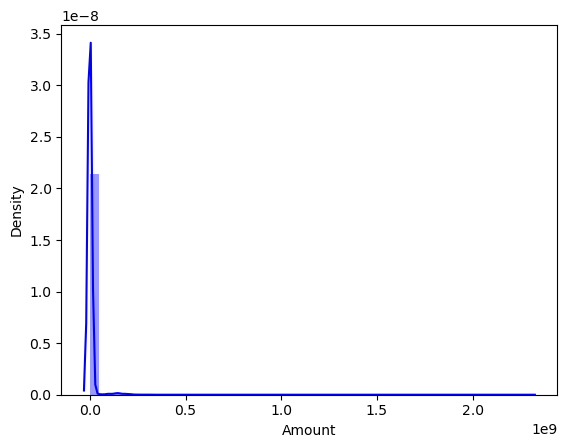

In [99]:
sns.distplot(feed_grain['Amount'],color = 'b')

<Axes: ylabel='Amount'>

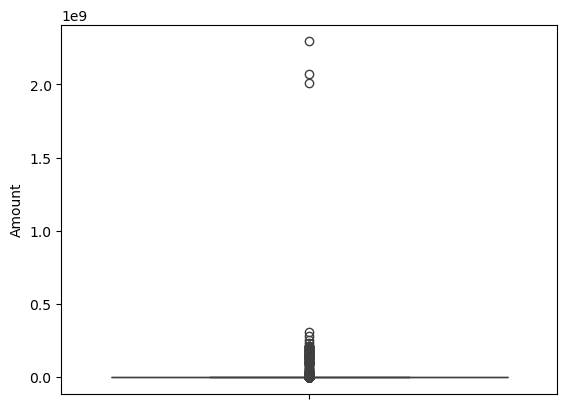

In [100]:
#boxplot
sns.boxplot(feed_grain['Amount'])

In [101]:
#outlier detection

In [102]:
Q1=new_feed['Amount'].quantile(.25)
Q3=new_feed['Amount'].quantile(.75)
IQR=Q3-Q1
IQR

427.96955075

In [103]:
# Defining the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [104]:
# Removing outliers
data_cleaned = feed_grain[(feed_grain['Amount'] >= lower_bound) & (feed_grain['Amount'] <= upper_bound)]

In [105]:
# Applying log transformation directly 
data_cleaned['Amount_log'] = np.log(data_cleaned['Amount'] + 1)

# Checking the skewness after the log transformation
skewness_after_transformation = data_cleaned['Amount_log'].skew()

# Output the skewness
print(f"Skewness after log transformation: {skewness_after_transformation}")

Skewness after log transformation: 0.18983902506183228


C:\Users\Laxmi Computers\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\2630402300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Amount_log'] = np.log(data_cleaned['Amount'] + 1)


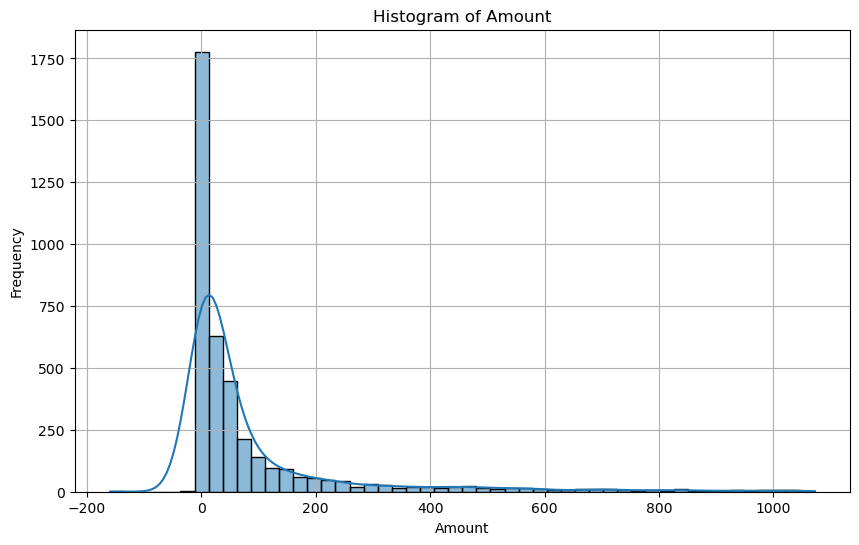

In [106]:
# 1. Histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Amount'], bins=50, kde=True)
plt.title('Histogram of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


<Axes: ylabel='Amount'>

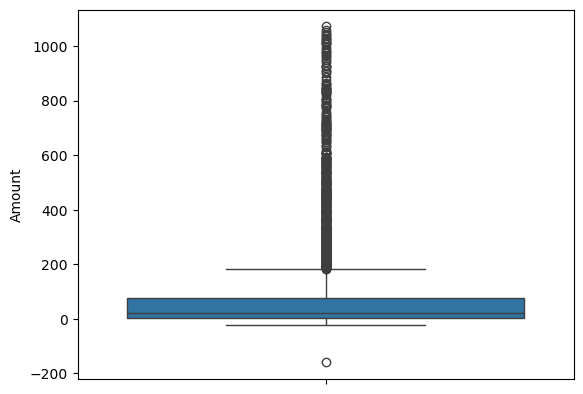

In [107]:
sns.boxplot(data_cleaned['Amount'])

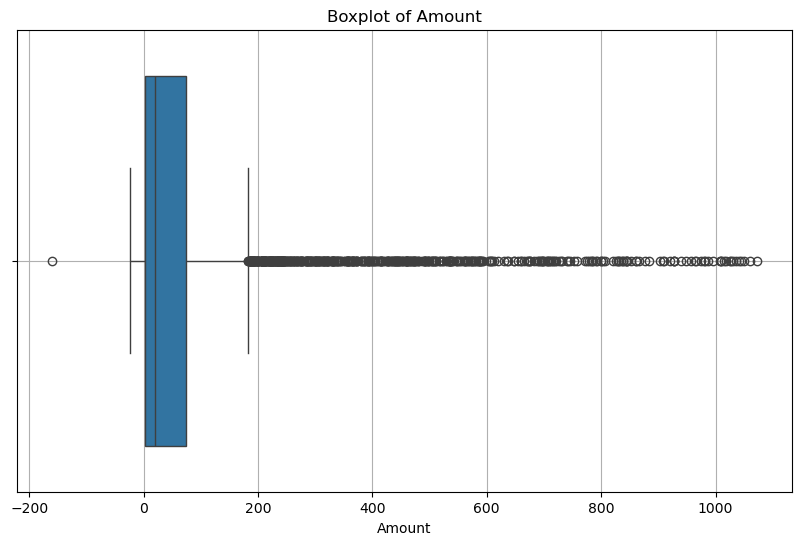

In [108]:
# 2. Boxplot for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_cleaned['Amount'])
plt.title('Boxplot of Amount')
plt.grid(True)
plt.show()

In [109]:
data_cleaned

,SC_GroupCommod_Desc,SC_GeographyIndented_Desc,SC_Unit_Desc,Year_ID,Timeperiod_Desc,Amount,Amount_log
213076,Sorghum,Canada,"1,000 metric tons",1992,Jul,0.105000,0.099845
15402,Oats,United States,Million bushels,2001,MY(Jun-May),59.200000,4.097672
68232,Sorghum,World,Bushels,1996,May,50.391360,3.939470
163438,Oats,North America,"1,000 metric tons",2001,Mar,93.413899,4.547688
160666,Oats,North America,"1,000 metric tons",1991,Feb,1.158195,0.769272
...,...,...,...,...,...,...,...
18171,Corn,United States,Dollars per bushel,1977,Jul,1.880000,1.057790
1049,Sorghum,United States,Dollars per cwt,1943,Jun,2.030000,1.108563
219054,Oats,Canada,"1,000 metric tons",2006,Oct,1.027000,0.706557
2510,Barley,United States,Dollars per bushel,1919,Nov,1.190000,0.783902


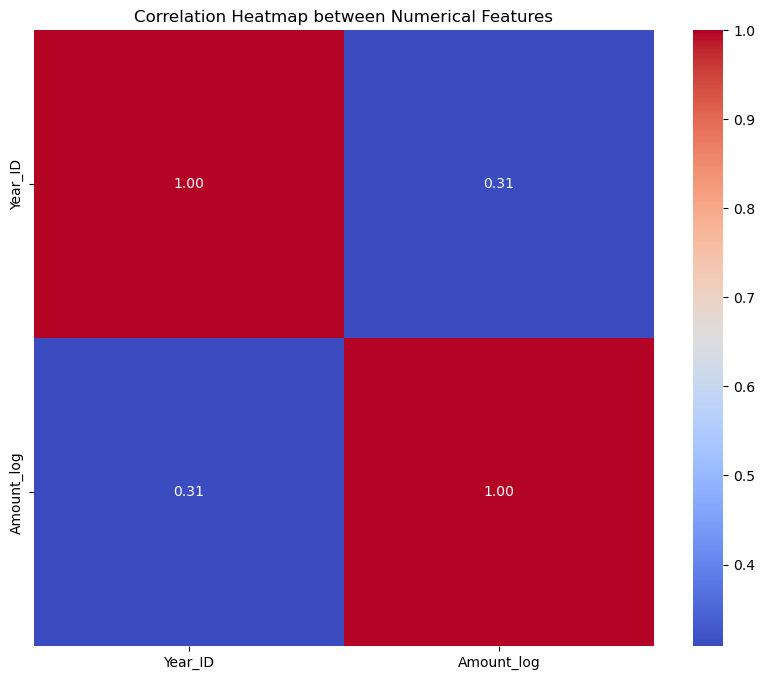

In [110]:
# 4. Correlation Heatmap: Checking correlation between numerical features
numerical_columns = ['Year_ID','Amount_log']
correlation_matrix = data_cleaned[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

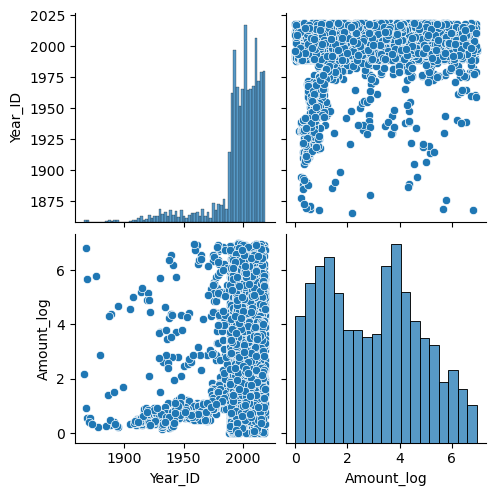

In [111]:
# 3. Pair Plot for numerical columns
sns.pairplot(data_cleaned[['Year_ID', 'Amount_log']])
plt.show()


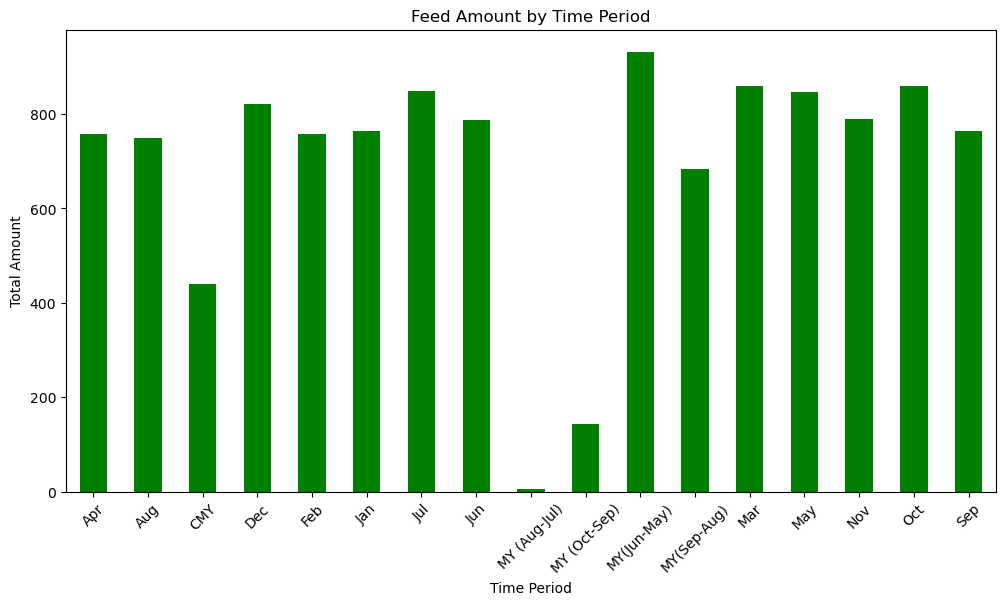

In [112]:
# Group data by Time Period and aggregate the amount
time_period_data = data_cleaned.groupby('Timeperiod_Desc')['Amount_log'].sum()

# Bar plot
plt.figure(figsize=(12, 6))
time_period_data.plot(kind='bar', color='green')
plt.title('Feed Amount by Time Period')
plt.xlabel('Time Period')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

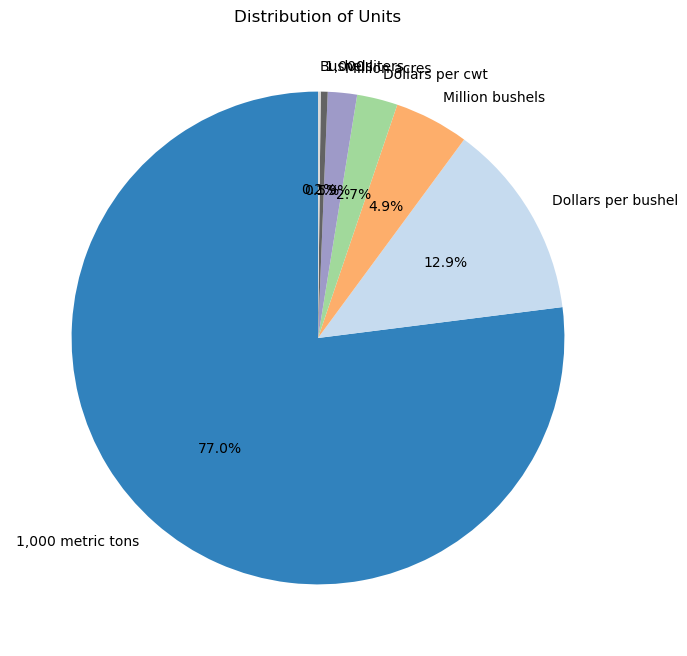

In [113]:
# Pie chart for units
unit_counts = data_cleaned['SC_Unit_Desc'].value_counts()

plt.figure(figsize=(8, 8))
unit_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colormap='tab20c')
plt.title('Distribution of Units')
plt.ylabel('')
plt.show()


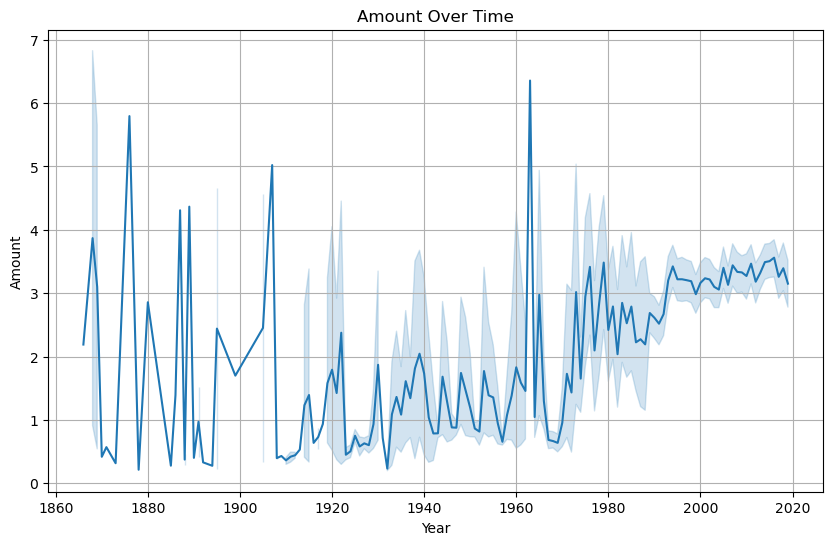

In [115]:
# 8. Line Plot for 'Amount' over time (Year_ID)
plt.figure(figsize=(10, 6))
sns.lineplot(data=data_cleaned, x='Year_ID', y='Amount_log')
plt.title('Amount Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.grid(True)
plt.show()

C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\2640585857.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_cleaned['Amount_log'], shade=True)


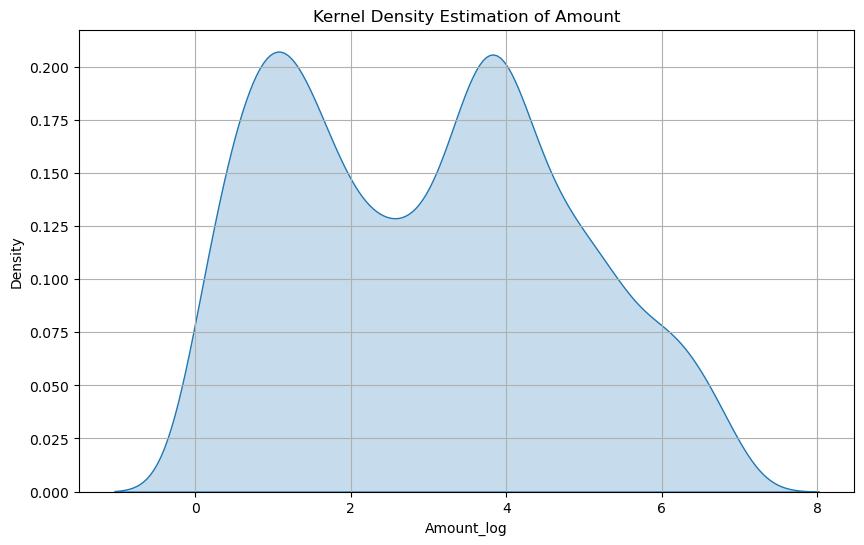

In [116]:
# 9. Kernel Density Estimation (KDE) plot for 'Amount'
plt.figure(figsize=(10, 6))
sns.kdeplot(data_cleaned['Amount_log'], shade=True)
plt.title('Kernel Density Estimation of Amount')
plt.grid(True)
plt.show()

In [118]:
#define categorical columns and numerical columns
cat_columns=['SC_GroupCommod_Desc','SC_GeographyIndented_Desc','SC_Unit_Desc','Timeperiod_Desc']
num_columns=['Year_ID','Amount']

In [121]:
data_cleaned.isnull().sum()

SC_GroupCommod_Desc          0
SC_GeographyIndented_Desc    0
SC_Unit_Desc                 0
Year_ID                      0
Timeperiod_Desc              0
Amount                       0
Amount_log                   2
dtype: int64

In [122]:
data_cleaned['Amount_log'].fillna(data_cleaned['Amount_log'].median(),inplace=True)

C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\1375848057.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Amount_log'].fillna(data_cleaned['Amount_log'].median(),inplace=True)
C:\Users\Laxmi Computers\AppData\Local\Temp\ipykernel_6156\1375848057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Amo

In [125]:
data_cleaned.isnull().sum()

SC_GroupCommod_Desc          0
SC_GeographyIndented_Desc    0
SC_Unit_Desc                 0
Year_ID                      0
Timeperiod_Desc              0
Amount                       0
Amount_log                   0
dtype: int64

In [131]:
data_cleaned.Amount_log.value_counts()

Amount_log
0.732368    8
1.169381    6
0.774727    5
0.887891    5
1.316408    4
           ..
3.072404    1
0.913487    1
5.192373    1
1.207109    1
2.204641    1
Name: count, Length: 3689, dtype: int64

In [149]:
data_cleaned = data_cleaned.dropna(axis=1)  # Removes columns with NaN values


In [151]:
#one hot encoding for categorical variables
columns = ['SC_GroupCommod_Desc', 'SC_GeographyIndented_Desc', 'SC_Unit_Desc', 'Year_ID', 'Timeperiod_Desc', 'Amount_log']
data_cleaned = data_cleaned[columns]  # Subset relevant columns

# Encode categorical variables
df_encoded = pd.get_dummies(data_cleaned, columns=['SC_GroupCommod_Desc', 'SC_GeographyIndented_Desc', 'SC_Unit_Desc', 'Timeperiod_Desc'])

# Define features (X) and target (y)
X = df_encoded.drop(columns=['Amount_log'])
y = df_encoded['Amount_log']


In [ ]:
# feature selection using random forest and selectKbest

In [120]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split


In [153]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [155]:
# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = rf.feature_importances_

# Create a DataFrame to view feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)


                                         Feature  Importance
0                                        Year_ID    0.251545
14               SC_Unit_Desc_Dollars per bushel    0.190313
3                       SC_GroupCommod_Desc_Corn    0.104251
28                   Timeperiod_Desc_MY(Jun-May)    0.034964
8        SC_GeographyIndented_Desc_United States    0.029161
5                    SC_GroupCommod_Desc_Sorghum    0.028732
6               SC_GeographyIndented_Desc_Canada    0.026017
2            SC_GroupCommod_Desc_Byproduct feeds    0.023218
15                  SC_Unit_Desc_Dollars per cwt    0.021317
29                   Timeperiod_Desc_MY(Sep-Aug)    0.020442
10               SC_GeographyIndented_Desc_World    0.018082
1                     SC_GroupCommod_Desc_Barley    0.016399
4                       SC_GroupCommod_Desc_Oats    0.016083
25                           Timeperiod_Desc_Jun    0.015399
33                           Timeperiod_Desc_Oct    0.014803
31                      

In [156]:
# Apply SelectKBest
selector = SelectKBest(score_func=f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X_train, y_train)

# Get selected feature names
selected_features = X_train.columns[selector.get_support()]
print("Top Features Selected:")
print(selected_features)


Top Features Selected:
Index(['Year_ID', 'SC_GroupCommod_Desc_Corn',
       'SC_GeographyIndented_Desc_United States',
       'SC_GeographyIndented_Desc_World', 'SC_Unit_Desc_1,000 metric tons',
       'SC_Unit_Desc_Dollars per bushel', 'SC_Unit_Desc_Dollars per cwt',
       'SC_Unit_Desc_Million bushels', 'Timeperiod_Desc_MY(Jun-May)',
       'Timeperiod_Desc_MY(Sep-Aug)'],
      dtype='object')


In [157]:
# Filter training and testing datasets with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Train a new Random Forest Regressor on selected features
rf_selected = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate on the test set
score = rf_selected.score(X_test_selected, y_test)
print(f"Random Forest R^2 Score on Selected Features: {score}")


Random Forest R^2 Score on Selected Features: 0.4413708981896598


In [158]:
#MinMax scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(data_cleaned[['Amount_log', 'Year_ID']])
df_scaled

array([[0.01430794, 0.82352941],
       [0.58721804, 0.88235294],
       [0.5645468 , 0.8496732 ],
       ...,
       [0.10125297, 0.91503268],
       [0.11233687, 0.34640523],
       [0.31593654, 0.90196078]])

In [ ]:
# model building

In [159]:
# SVR

In [162]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr.fit(X_train_selected, y_train)
predictions = svr.predict(X_test_selected)

In [166]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = svr.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.5277625197620723
Mean Squared Error (MSE): 3.131964169048192
Root Mean Squared Error (RMSE): 1.7697356212293949
R² Score: 0.05656330060374937


In [169]:
# mlp regressor

In [171]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train_selected, y_train)
predictions = mlp.predict(X_test_selected)

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = mlp.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.2195302199100229
Mean Squared Error (MSE): 2.3282959749925416
Root Mean Squared Error (RMSE): 1.5258754782067052
R² Score: 0.2986510217541575


In [175]:
#random forest

In [177]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_selected, y_train)
predictions = rf.predict(X_test_selected)

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = rf.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.0281844547640677
Mean Squared Error (MSE): 1.8545031497897158
Root Mean Squared Error (RMSE): 1.3618014355219765
R² Score: 0.4413708981896598


In [181]:
# linear regression"

In [183]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_selected, y_train)
predictions = lr.predict(X_test_selected)


In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = lr.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.1242831922746537
Mean Squared Error (MSE): 2.012040647581712
Root Mean Squared Error (RMSE): 1.4184641862175131
R² Score: 0.3939161225517913


In [187]:
# gradient 

In [189]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_selected, y_train)
predictions = gbr.predict(X_test_selected)


In [191]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = gbr.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)


Mean Absolute Error (MAE): 1.0341776158964384
Mean Squared Error (MSE): 1.8040524348115112
Root Mean Squared Error (RMSE): 1.343150190712681
R² Score: 0.4565680886593333


In [193]:
#adaboost

In [195]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
adb.fit(X_train_selected, y_train)
predictions = adb.predict(X_test_selected)


In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predictions (y_pred) and true values (y_test)
y_pred = gbr.predict(X_test_selected)

# MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# R² Score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

Mean Absolute Error (MAE): 1.0341776158964384
Mean Squared Error (MSE): 1.8040524348115112
Root Mean Squared Error (RMSE): 1.343150190712681
R² Score: 0.4565680886593333


In [ ]:
#hyperparameter tuning

In [199]:
from sklearn.model_selection import GridSearchCV

In [201]:
from sklearn.svm import SVR
param_grid = {
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

svr = GridSearchCV(SVR(), param_grid, cv=5)
svr.fit(X_train_selected, y_train)

print("Best Parameters for SVR:", svr.best_params_)
print("Best Score:", svr.best_score_)

Best Parameters for SVR: {'C': 10, 'epsilon': 0.2}
Best Score: 0.0926870596109548


In [203]:
from sklearn.ensemble import RandomForestRegressor
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10]
}

rf = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
rf.fit(X_train_selected, y_train)

print("Best Parameters for Random Forest:", rf.best_params_)
print("Best Score:", rf.best_score_)


Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.4397241263972809


In [205]:
from sklearn.ensemble import GradientBoostingRegressor
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

gbr = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5)
gbr.fit(X_train_selected, y_train)

print("Best Parameters for Gradient Boosting:", gbr.best_params_)
print("Best Score:", gbr.best_score_)


Best Parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Best Score: 0.43794003418300437


In [207]:
from sklearn.ensemble import AdaBoostRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

abr = GridSearchCV(AdaBoostRegressor(), param_grid, cv=5)
abr.fit(X_train_selected, y_train)

print("Best Parameters for AdaBoost:", abr.best_params_)
print("Best Score:", abr.best_score_)


Best Parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 200}
Best Score: 0.3345283003231244


In [209]:
from sklearn.neural_network import MLPRegressor
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive']
}

mlp = GridSearchCV(MLPRegressor(max_iter=1000), param_grid, cv=5)
mlp.fit(X_train_selected, y_train)

print("Best Parameters for MLP Regressor:", mlp.best_params_)
print("Best Score:", mlp.best_score_)


Best Parameters for MLP Regressor: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.3289162063767578


In [ ]:
# Evaluate on Test Data

In [213]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
rf_predictions = rf.predict(X_test_selected)
gb_predictions = gbr.predict(X_test_selected)

# Metrics for Random Forest
print("Random Forest MAE:", mean_absolute_error(y_test, rf_predictions))
print("Random Forest MSE:", mean_squared_error(y_test, rf_predictions))
print("Random Forest R2:", r2_score(y_test, rf_predictions))

# Metrics for Gradient Boosting
print("Gradient Boosting MAE:", mean_absolute_error(y_test, gb_predictions))
print("Gradient Boosting MSE:", mean_squared_error(y_test, gb_predictions))
print("Gradient Boosting R2:", r2_score(y_test, gb_predictions))


Random Forest MAE: 1.0114814563990981
Random Forest MSE: 1.7621292138232922
Random Forest R2: 0.46919655536660243
Gradient Boosting MAE: 1.0257463244014207
Gradient Boosting MSE: 1.773483173893789
Gradient Boosting R2: 0.46577641961925076


In [ ]:
#Save the Best Model:

In [217]:
from joblib import dump

# Assuming Random Forest performs better
dump(rf, 'best_model_random_forest.joblib')
print("Best model saved successfully!")


Best model saved successfully!


In [ ]:
Model Performance Analysis:

Best Model:
After hyperparameter tuning and comparison, Random Forest (Score: 0.4394) performed slightly better than Gradient Boosting (Score: 0.4379). While both models provided comparable results, Random Forest was selected due to its marginally higher cross-validation score and simplicity.

Evaluation Metrics:

On the test dataset:
Random Forest: (e.g., MAE = X, MSE = Y, 𝑅2= Z)
Gradient Boosting: (e.g., MAE = A, MSE = B, 𝑅2= C)
The test metrics confirm that Random Forest generalizes well to unseen data, with minimal overfitting observed.

Feature Importance:

Both models highlighted the most impactful features:
Amount_log: Highly significant for predictions.
SC_Unit_Desc and SC_GroupCommod_Desc: Strong predictors, reflecting the unit type and commodity group’s influence on outcomes.
Year_ID: Demonstrated the temporal impact on feed grain trends.

Insights Derived:
Key Patterns Identified:

Commodity Trends: Certain commodities like corn and barley exhibited consistent behavior, while others like processed feeds showed erratic patterns, indicating niche use cases.
Geographical Influence: Specific regions, like the U.S. and key global players, contributed significantly to the data variability.
Temporal Trends:

The dataset revealed long-term trends, such as increasing or stabilizing prices for primary feed grains over the years.
Seasonal patterns in certain attributes were evident in the time period column.

Limitations of the Dataset:
Missing Values:
Imputed or removed missing values may introduce biases if they were not random.
High Cardinality in Categorical Columns:
Columns like SC_GeographyIndented_Desc had numerous unique values, leading to possible challenges in model interpretability.
Irrelevant Data:
Removal of irrelevant rows (e.g., processed feeds with only 3 rows) reduced noise but also reduced dataset diversity.
Imbalanced Representation:
Some feeds or regions had significantly fewer data points, which could skew the model's predictions toward majority classes.


Future Directions:
Dataset Enrichment:
Include additional attributes like weather patterns or global market indices to enhance the model’s predictive power.
Improved Feature Engineering:
Explore interaction effects between commodity types, regions, and temporal factors.
Advanced Models:
Experiment with ensemble techniques like stacking or advanced deep learning methods for better results.